# Branch regulator detection

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from itertools import chain
import scipy
import sklearn
import pydot
import scanpy as sc
import seaborn as sns
import colorcet as cc
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from datetime import datetime
from matplotlib.backends.backend_pdf import PdfPages
import util

In [2]:
import phlower
phlower.__version__

'0.1.3'

In [3]:
!mkdir save
!wget --no-check-certificate --no-verbose  https://costalab.ukaachen.de/open_data/PHLOWER/multiome_phlower.pickle -O save/multiome_phlower.pickle
!wget --no-check-certificate --no-verbose  https://costalab.ukaachen.de/open_data/PHLOWER/multiome_chromvar.h5 -O multiome_chromvar.h5

mkdir: cannot create directory ‘save’: File exists
2024-10-16 12:37:00 URL:https://costalab.ukaachen.de/open_data/PHLOWER/multiome_phlower.pickle [4365968492/4365968492] -> "save/multiome_phlower.pickle" [1]
2024-10-16 12:37:01 URL:https://costalab.ukaachen.de/open_data/PHLOWER/multiome_chromvar.h5 [73101100/73101100] -> "multiome_chromvar.h5" [1]


In [4]:
import pickle as pkl 
adata = pkl.load(open("save/multiome_phlower.pickle", 'rb'))

tfbdata = sc.read_10x_h5("save/multiome_chromvar.h5")
tfbdata.var_names = [i.upper() for i in tfbdata.var_names]

assert(all(tfbdata.obs_names == adata.obs_names))

import copy
tfbdata.obs = copy.deepcopy(adata.obs)
tfbdata.obsm = copy.deepcopy(adata.obsm)
tfbdata.uns = copy.deepcopy(adata.uns)


## Podocytes regulator versus Tubular

In [5]:
phlower.tl.branch_regulator_detect(adata, tfbdata, branch='Podocytes', log2fc=1, correlation=0.7)

branch_2 ['Tubular']
shapes:  (32, 746) (43, 746)
vs_name:  markers_Podocytesvs


/home/sz753404/miniconda3/envs/R422/lib/python3.10/site-packages/phlower/tools/tree_feature_markers.py:1133: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr = pearsonr(expression, TF)[0]


#### TF markers volcano

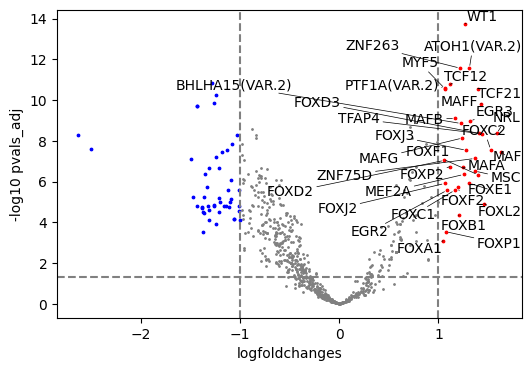

In [6]:
df = phlower.tl.get_markers_df(tfbdata, 'markers_Podocytesvs')
fig, ax = plt.subplots(1,1, figsize=(6, 4))
phlower.pl.volcano(df, log2fc_column='logfoldchanges', pval_column='pvals_adj',log2fc_threshold=[-1, 1],  pval_threshold=0.05, is_adjust_text=True, text_size=10, text_up_down='up', ax=ax, show_legend=False)

#### TF gene correlations

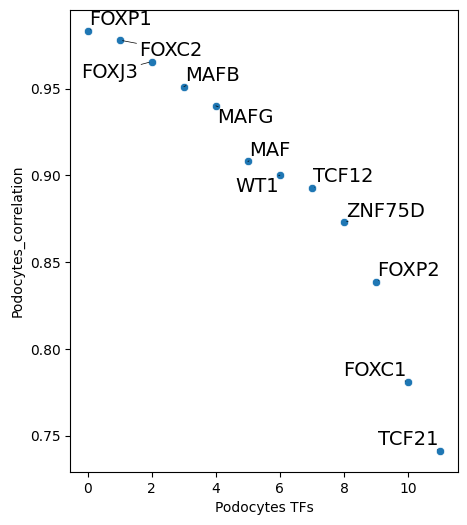

In [7]:
_, ax = plt.subplots(1,1,figsize=(5,6)) 
phlower.pl.regulator_dot_correlation(tfbdata, 'Podocytes', ax=ax)

#### Heatmap along Podocytes trajectory

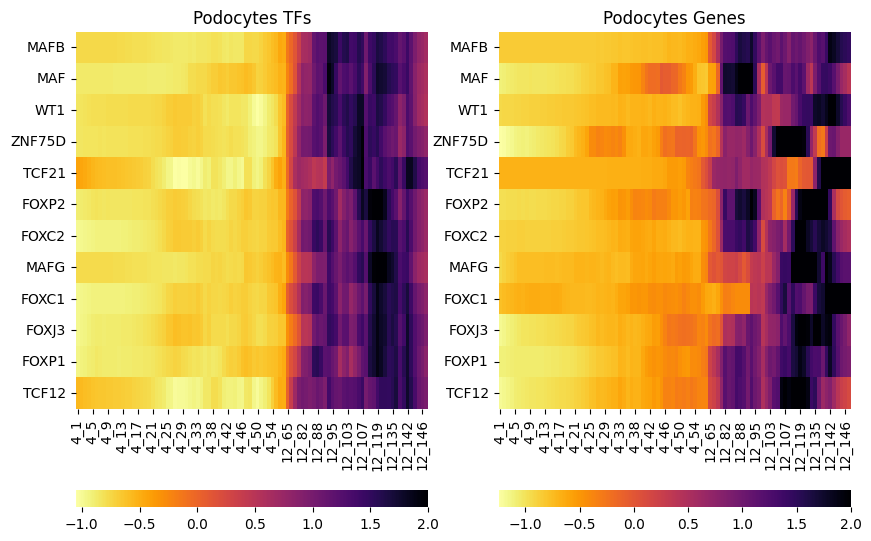

In [8]:
_,_ = phlower.pl.regulator_heatmap(adata, tfbdata, 'Podocytes', figsize=(10, 7))

## Tubular regulator versus Podocytes

In [9]:
phlower.tl.branch_regulator_detect(adata, tfbdata, branch='Tubular', log2fc=1, correlation=0.7)

branch_2 ['Podocytes']
shapes:  (43, 746) (32, 746)
vs_name:  markers_Tubularvs


/home/sz753404/miniconda3/envs/R422/lib/python3.10/site-packages/phlower/tools/tree_feature_markers.py:1133: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr = pearsonr(expression, TF)[0]


In [ ]:
df = phlower.tl.get_markers_df(tfbdata, 'markers_Tubularvs')
fig, ax = plt.subplots(1,1, figsize=(6, 4))
phlower.pl.volcano(df, log2fc_column='logfoldchanges', pval_column='pvals_adj',log2fc_threshold=[-1, 1],  pval_threshold=0.05, is_adjust_text=True, text_size=10, text_up_down='up', ax=ax, show_legend=False)

In [ ]:
_, ax = plt.subplots(1,1,figsize=(5,6)) 
phlower.pl.regulator_dot_correlation(tfbdata, 'Tubular', ax=ax)

In [ ]:
_,_ = phlower.pl.regulator_heatmap(adata, tfbdata, 'Tubular', figsize=(10, 7))

## Muscle regulator versus Nueron-1 & Nueron-2

In [ ]:
phlower.tl.branch_regulator_detect(adata, tfbdata, branch='Muscle', log2fc=0.5, correlation=0.7)

In [ ]:
df = phlower.tl.get_markers_df(tfbdata, 'markers_Musclevs')
fig, ax = plt.subplots(1,1, figsize=(6, 4))
phlower.pl.volcano(df, log2fc_column='logfoldchanges', pval_column='pvals_adj',log2fc_threshold=[-1.5, 0.5],  pval_threshold=0.05, is_adjust_text=True, text_size=10, text_up_down='up', ax=ax, show_legend=False)

In [ ]:
_, ax = plt.subplots(1,1,figsize=(5,6)) 
phlower.pl.regulator_dot_correlation(tfbdata, 'Muscle', ax=ax)

In [ ]:
_,_ = phlower.pl.regulator_heatmap(adata, tfbdata, 'Muscle',  figsize=(10, 7))

In [ ]:
import session_info
session_info.show()